In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import cmath
import math
import csv

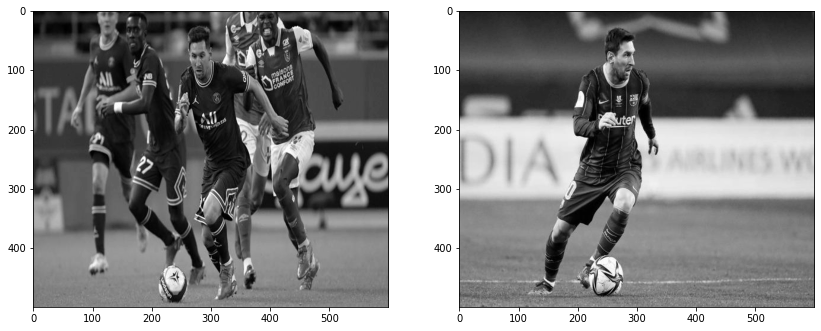

In [7]:
#  load tow image 
img_1 = cv2.imread('static/img/resizeimagemessi1.jpg',0)
img_2= cv2.imread('static/img/resizeimagemessi2.jpg',0)

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(img_1, cmap='gray')
plt.subplot(122)
plt.imshow(img_2, cmap='gray')
plt.show()



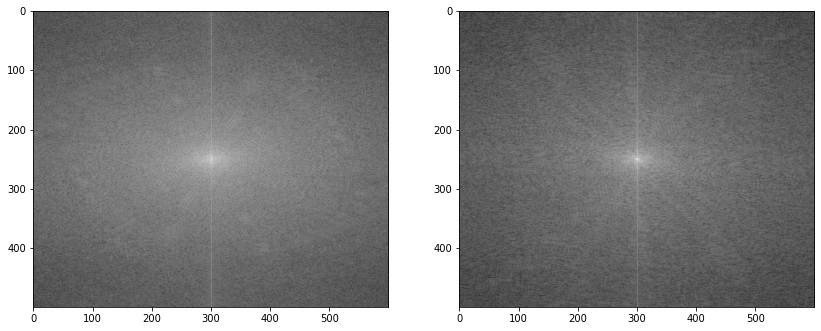

In [8]:
img_1_fft = np.fft.fftshift(np.fft.fft2(img_1))
img_2_fft = np.fft.fftshift(np.fft.fft2(img_2))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(img_1_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(img_2_fft)), cmap='gray')
plt.show()


In [9]:
img_1_amplitude = np.sqrt(np.real(img_1_fft) ** 2 + np.imag(img_1_fft) ** 2)
img_1_phase = np.arctan2(np.imag(img_1_fft), np.real(img_1_fft))
img_2_amplitude = np.sqrt(np.real(img_2_fft) ** 2 + np.imag(img_2_fft) ** 2)
img_2_phase = np.arctan2(np.imag(img_2_fft), np.real(img_2_fft))

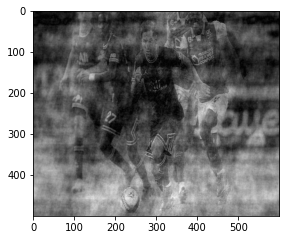

In [10]:
# amplitude_phase
amp_img_1_phase_img2 = np.multiply(img_2_amplitude, np.exp(1j * img_1_phase))

invers_amp_img_1_phase_img2 = np.real(np.fft.ifft2(amp_img_1_phase_img2))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(invers_amp_img_1_phase_img2), cmap='gray')
